In [1]:
import sympy as sp
import numpy as np
import matplotlib.pylab as plt

In [2]:
w, f_c = sp.symbols(r'w, f_c', real=True)
B = sp.symbols(r'B', nonnegative=True)
n, d_s = sp.symbols(r'n, d_s', nonnegative=True)
s = sp.Symbol('s', nonnegative = True)
E = sp.Symbol(r'E', nonnegative=True)
p, P = sp.symbols(r'p, P', nonnegative=True)
tau = sp.symbols(r'\bar{\tau}', nonnegative=True)
sig_y = sp.symbols('\sigma_y', positive=True)
A = sp.Symbol(r'A', nonnegative = True)
pi = sp.Symbol(r'\pi', nonnegative=True)

In [3]:
p = pi * d_s
A = pi * d_s ** 2 / 4
A

\pi*d_s**2/4

In [4]:
Pw_pull = sp.sqrt(2 * w * tau * E * A * p)

P_max = A * sig_y

w_argmax = sp.solve(P_max - Pw_pull, w)[0]
w_argmax

\sigma_y**2*d_s/(8*E*\bar{\tau})

In [5]:
Pw_pull_y = sp.Piecewise(
    (Pw_pull, w < w_argmax),
    (P_max, w >= w_argmax))

In [6]:
Pw_pull_y

Piecewise((sqrt(2)*sqrt(E)*sqrt(\bar{\tau})*\pi*d_s**(3/2)*sqrt(w)/2, w < \sigma_y**2*d_s/(8*E*\bar{\tau})), (\pi*\sigma_y*d_s**2/4, True))

In [7]:
b_n = B - n * d_s

In [8]:
V_d_max = 1.64 * b_n * d_s * f_c ** (1 / 3)

V_da_1 = V_d_max * (s / 0.05) * (2 - (s / 0.05))

V_da_2 = V_d_max * ((2.55 - s) / 2.5)

In [9]:
V_da = sp.Piecewise(
        (V_da_1, s <= 0.05),
        (V_da_2, s > 0.05))

In [10]:
V_da

Piecewise((20.0*d_s*f_c**0.333333333333333*s*(2 - 20.0*s)*(1.64*B - 1.64*d_s*n), s <= 0.05), (d_s*f_c**0.333333333333333*(1.02 - 0.4*s)*(1.64*B - 1.64*d_s*n), True))

In [11]:
params = {
    B : 250,
    d_s : 28,
    n : 2,
    f_c : 33.3,
    tau : 0.4,
    E : 210000,
    sig_y : 713,
    pi : 3.14
    
}

In [12]:
get_Pw_pull_y = sp.lambdify(w, Pw_pull_y.subs(params), 'numpy')
Pw_pull_y.subs(params)

Piecewise((38923.8432634805*sqrt(6)*sqrt(w), w < 21.1820416666667), (438808.72, True))

In [13]:
get_V_da_val = sp.lambdify(s, V_da.subs(params), 'numpy')
V_da.subs(params)

Piecewise((573211.66016519*s*(2 - 20.0*s), s <= 0.05), (29233.7946684247 - 11464.2332033038*s, True))

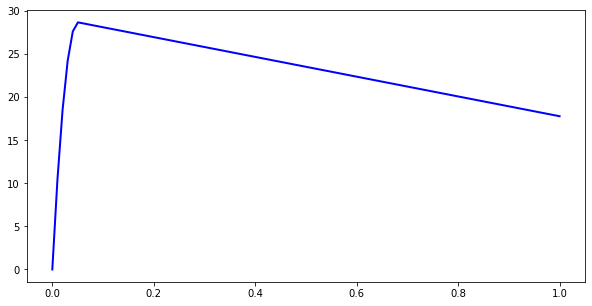

In [18]:
_, (ax1) = plt.subplots(1, 1, figsize=(10,5))
s_data = np.linspace(0, 1, 100)
V_da_val = get_V_da_val(s_data)
ax1.plot(s_data, V_da_val / 1000, color='blue', lw=2);

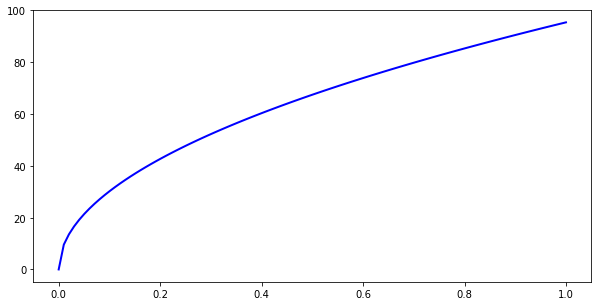

In [17]:
_, (ax1) = plt.subplots(1, 1, figsize=(10,5))
w_data = np.linspace(0, 1, 100)
Pw_pull_y_val = get_Pw_pull_y(w_data)
ax1.plot(w_data, Pw_pull_y_val / 1000, color='blue', lw=2);